In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import scipy.io as sio
import pandas as pd

In [2]:
"""
data = sio.loadmat('mnist.mat')


Xtrain = data['trainX'][:10000,:].astype(int)
Xtest = data['testX'].astype(int)
ytrain =data['trainY'][0,:10000].astype(int)
ytest =  data['testY'][0,:].astype(int)

idx = np.logical_or(np.equal(ytrain,4), np.equal(ytrain,9))
Xtrain = Xtrain[idx,:]
ytrain = ytrain[idx]
ytrain[np.equal(ytrain,4)] = 1
ytrain[np.equal(ytrain,9)] = -1

idx = np.logical_or(np.equal(ytest,4), np.equal(ytest,9))
Xtest = Xtest[idx,:]
ytest = ytest[idx]
ytest[np.equal(ytest,4)] = 1
ytest[np.equal(ytest,9)] = -1


sio.savemat('mnist_binary_small.mat',{'Xtrain':Xtrain,'ytrain':ytrain,'Xtest':Xtest,'ytest':ytest})
"""

data = sio.loadmat('mnist_binary_small.mat')
Xtrain = data['Xtrain']
Xtest = data['Xtest']
ytrain = data['ytrain'][0,:]
ytest = data['ytest'][0,:]

print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)


(1958, 784) (1991, 784) (1958,) (1991,)


In [33]:
def get_weighted_misclass(w,y,yhat):
    result = 0
    total = 0
    for i in range(len(y)):
        if y[i] != yhat[i]:
            result += w[i]
        total += w[i]
    return result/total
    

def get_misclass(y,yhat):
    incorrect = 0;
    for i in range(len(y)):
        if y[i] != yhat[i]:
            incorrect += 1
    return incorrect / len(y)


def get_exp_loss(y,yhat):
    return (1/len(y)) * np.exp((np.not_equal(y,yhat)).astype(int))

In [34]:
def fit2(X,y,M):
    training_error = []
    weak_classifiers = []
    alphas = []
    errors = []
    
    N = len(y)
    weights = np.array([1/N for i in range(N)])
    
    
    for m in range(M):
            
        G_m = tree.DecisionTreeClassifier(max_depth = 1)
        G_m.fit(X, y, weights)
        y_hat = G_m.predict(X)
        
        error = 0
        total = 0
        for i in range(len(weights)):
            if (y[i] != y_hat[i]):
                error += weights[i]
            total += weights[i]
            ## error = sum(w_i * (np.not_equal(y, y_hat)).astype(int))/sum(w_i)
        error = error/total
        errors.append(error)
        alpha = np.log((1 - error) / error) / 2
            
        alphas.append(alpha)
        weak_classifiers.append(G_m)
        
        weights = weights * np.exp(alpha * (np.not_equal(y, y_hat)).astype(int))
        
    return alphas, errors

In [35]:
def fit(X,y,M):
    training_error = []
    weak_classifiers = []
    alphas = []
    
    N = len(y)
    weights = np.array([1/N for i in range(N)])
    
    
    for m in range(M):    
        G_m = tree.DecisionTreeClassifier(max_depth = 1)
        G_m.fit(X, y, weights)
        y_hat = G_m.predict(X)
        
        error = 0
        total = 0
        for i in range(len(weights)):
            if (y[i] != y_hat[i]):
                error += weights[i]
            total += weights[i]
            ## error = sum(w_i * (np.not_equal(y, y_hat)).astype(int))/sum(w_i)
        error = error/total
        alpha = np.log((1 - error) / error) / 2
            
        alphas.append(alpha)
        weak_classifiers.append(G_m)
        
        weights = weights * np.exp(alpha * (np.not_equal(y, y_hat)).astype(int))
    
    
    
    weak_preds = []
    for m in range(M):
        y_pred_m = weak_classifiers[m].predict(X) * alphas[m]
        weak_preds.append(y_pred_m)
       
    y_pred = []
    
    for i in range(len(y)):
        c = 0
        for j in range(M):
            c += weak_preds[j][i]
        
        if c >= 0: 
            y_pred.append(1)
        else:
            y_pred.append(-1)
    
    count = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            count += 1
    return 1 - count/len(y)

In [36]:
print(fit(Xtrain, ytrain,1))
print(fit(Xtest, ytest, 1))

0.10980592441266601
0.14967353088900048


Text(0.5, 0, 'M')

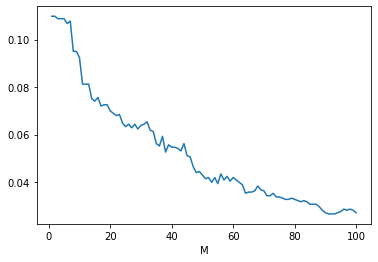

In [11]:
## graphing misclassification rate from M=1 -> M=10
x = []
rates = []
for i in range(100):
    x.append(i+1)
    rate = fit(Xtrain, ytrain, i+1)
    rates.append(rate)

plt.plot(x,rates)
plt.xlabel("M")


In [16]:
minX = rates[0]
for i in range(len(x)):
    if minX > rates[i]:
        minX = rates[i]
print(minX)

0.026557711950970342


Text(0, 0.5, 'Misclassifciation rate')

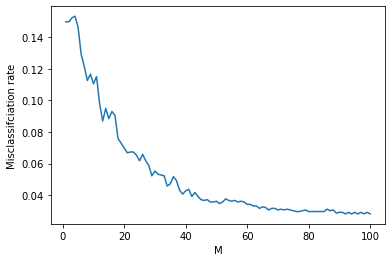

In [37]:
x2 = []
rates2 = []
for i in range(100):
    x2.append(i+1)
    rate2 = fit(Xtest, ytest, i+1)
    rates2.append(rate2)

plt.plot(x2,rates2)
plt.xlabel("M")
plt.ylabel("Misclassifciation rate")

In [38]:
minX2 = rates[0]
for i in range(len(x2)):
    if minX2 > rates2[i]:
        minX2 = rates2[i]
print(minX2)

0.02812656956303361


Text(0, 0.5, 'Alpha rate')

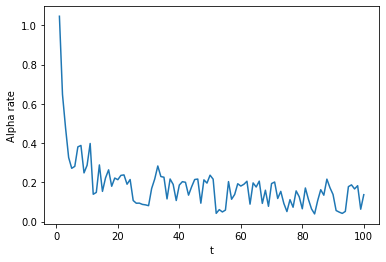

In [21]:
alphas,errors = fit2(Xtrain, ytrain, 100)
plt.plot(x2,alphas)
plt.xlabel("t")
plt.ylabel("Alpha rate")

Text(0, 0.5, 'Weighted Error')

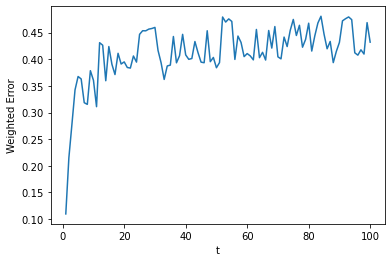

In [22]:
plt.plot(x2,errors)
plt.xlabel("t")
plt.ylabel("Weighted Error")